2.1 Compute the symbolic definite integral

In this first section I took the Sympy function to integrate the function from 1 to 7. By using the sympy function, defining x, and putting the answer into a decimal form I obtained an exact number from 1 to 7.

In [30]:
from sympy import *
def exact(a, b):
    x = Symbol('x')
    answer = float(integrate(x**3*sin(4*x), (x,a,b)))
    return answer

In [31]:
exact(1,7)

84.41637160591165

2.2 Implement a monte carlo integrator

In this next section we are using mcintegrate to find the low value, high values, obtain a new random value, and the approximation for the integral. Once we find the new x value I have to find the y value for the function. Then I am able to add up the y values in order to get the approximation for the integral while also multiplying it by the width. 

In [33]:
import random as random
import numpy as np

def f(x):
    return ((x**3)*np.sin(4*x))

def mcintegrate(a,b,n,fn):
    np.random.seed(1)
    runningSum = 0
    
    for i in range(n):
        x = np.random.rand()
        xnew = (x*(b-a)) +a
        y = fn(xnew)
        runningSum += y
        
        width = (b - a) / n
        approximation = runningSum * width 
        
    return approximation

In [34]:
mcintegrate(1,7,10000,f)

76.718665506714416

2.3 Study the error as a function of sample count 

In this last section I am plotting the value of the difference between the exact integral value and the value calculated by the monte carlo method. The x-axis is the count and the y-axis is the error. 

In [35]:
import matplotlib.pyplot as plt 

In [36]:
errors = []
counts = []
count = 1000
while count < 100000:
    errors.append(np.abs(mcintegrate(1,7,count,f) - exact(1,7)))
    counts.append(count)
    count += 1000

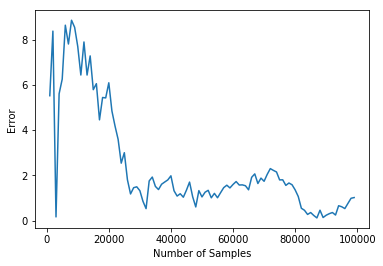

In [37]:
plt.plot(counts,errors)
plt.xlabel('Number of Samples')
plt.ylabel('Error')
plt.show()